In [1]:
# Load dependencies

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset, datetime conversion, and sort the dataset chronologically

df = pd.read_csv("../datasets/raw/Coca_Cola_historical_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)


In [3]:
# Data inspection

df.head()

,Open,High,Low,Close,Volume,ticker,name
Date,,,,,,,
1962-01-02 00:00:00-05:00,0.045368,0.046604,0.045368,0.045368,806400,KO,The Coca-Cola Company (KO) Historical Data
1962-01-03 00:00:00-05:00,0.044695,0.044695,0.043684,0.044358,1574400,KO,The Coca-Cola Company (KO) Historical Data
1962-01-04 00:00:00-05:00,0.044470,0.045032,0.044470,0.044695,844800,KO,The Coca-Cola Company (KO) Historical Data
1962-01-05 00:00:00-05:00,0.044695,0.045256,0.043572,0.043684,1420800,KO,The Coca-Cola Company (KO) Historical Data
1962-01-08 00:00:00-05:00,0.043347,0.043347,0.042392,0.043235,2035200,KO,The Coca-Cola Company (KO) Historical Data


In [4]:
df.tail()

,Open,High,Low,Close,Volume,ticker,name
Date,,,,,,,
2025-10-13 00:00:00-04:00,66.230003,66.800003,66.000000,66.800003,13690000,KO,The Coca-Cola Company (KO) Historical Data
2025-10-14 00:00:00-04:00,66.870003,67.570000,66.750000,67.510002,14245600,KO,The Coca-Cola Company (KO) Historical Data
2025-10-15 00:00:00-04:00,67.269997,67.720001,66.919998,67.080002,11193700,KO,The Coca-Cola Company (KO) Historical Data
2025-10-16 00:00:00-04:00,67.180000,68.110001,67.160004,67.589996,15707200,KO,The Coca-Cola Company (KO) Historical Data
2025-10-17 00:00:00-04:00,68.000000,68.500000,67.800003,68.440002,15531600,KO,The Coca-Cola Company (KO) Historical Data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16057 entries, 1962-01-02 00:00:00-05:00 to 2025-10-17 00:00:00-04:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    16057 non-null  float64
 1   High    16057 non-null  float64
 2   Low     16057 non-null  float64
 3   Close   16057 non-null  float64
 4   Volume  16057 non-null  int64  
 5   ticker  16057 non-null  object 
 6   name    16057 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1003.6+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04
mean,13.115615,13.215419,13.013003,13.118032,9.390436e+06
std,17.125877,17.242069,17.004588,17.126951,7.959269e+06
min,0.033701,0.033815,0.031648,0.033587,7.680000e+04
25%,0.221271,0.223151,0.219731,0.221348,3.168000e+06
50%,4.804174,4.843527,4.762158,4.804176,8.179200e+06
75%,17.594805,17.727165,17.474753,17.607119,1.338220e+07
max,72.307406,73.292796,71.854138,72.819817,1.241690e+08


In [7]:
# Column Normalization

df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ticker', 'name'], dtype='object')

<Axes: >

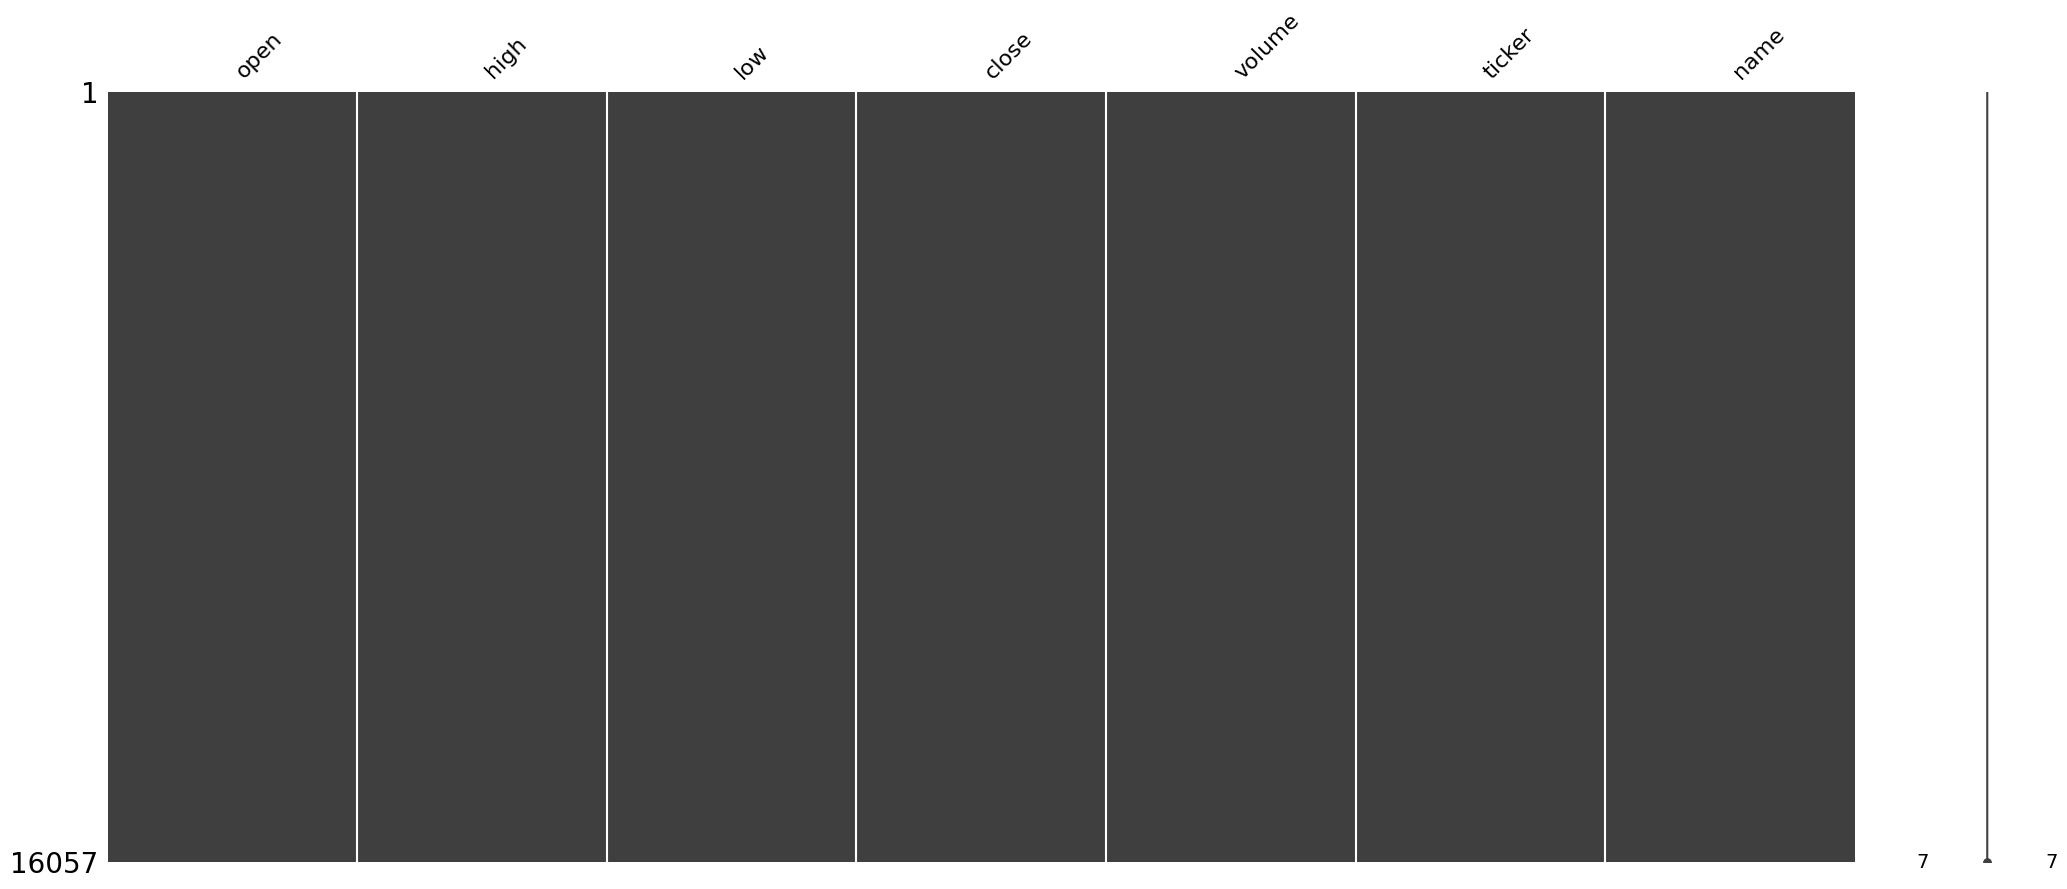

In [8]:
# Statistical Visualizations of missing values.

msno.matrix(df)

<Axes: >

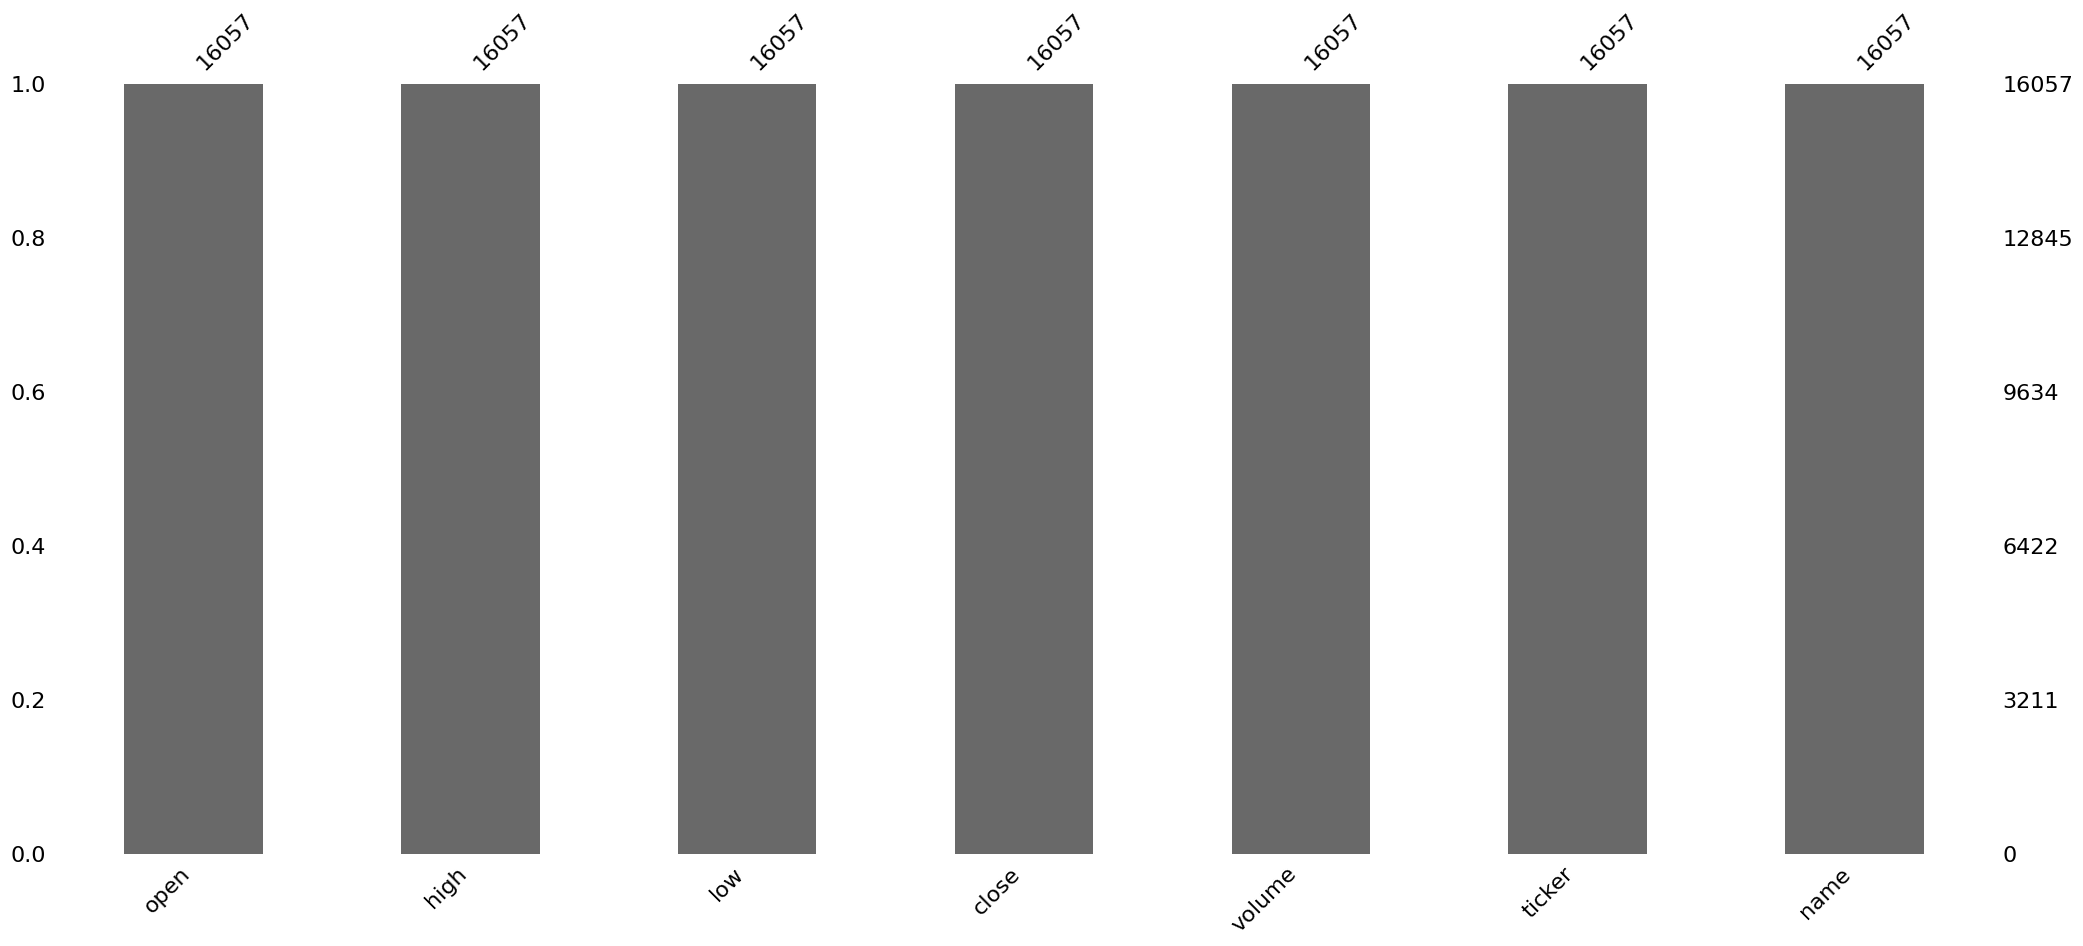

In [9]:
msno.bar(df)

<Axes: >

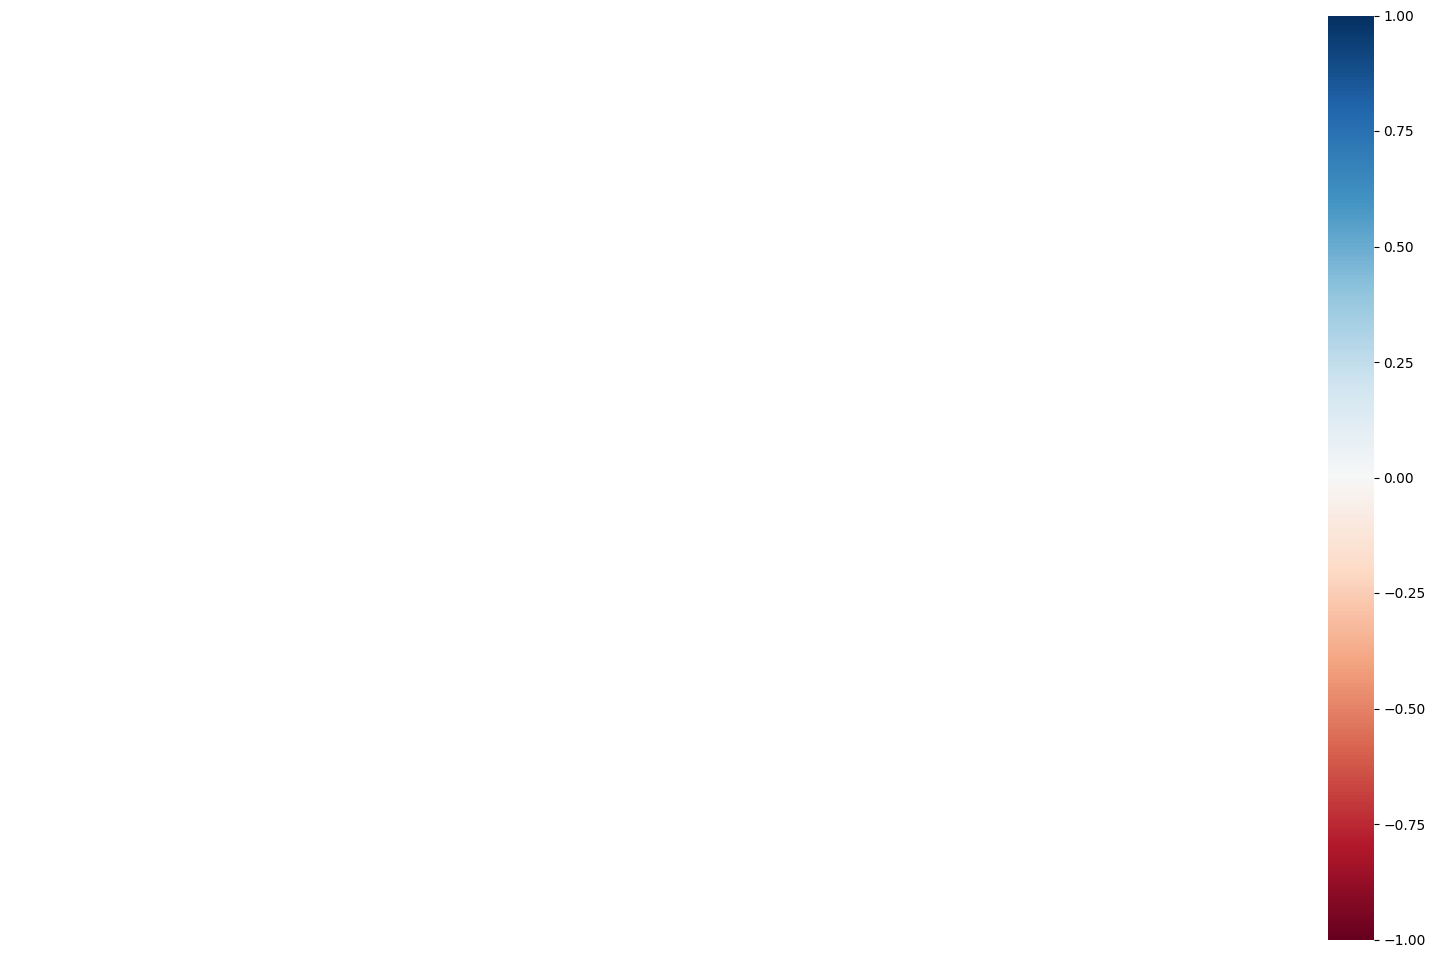

In [10]:
msno.heatmap(df)

### Observations: The matrix shows full bars/bars showing full counts, with 7 out of 7 features. The Bar plot shows 16057 for all the features. Finally, the heatmap is empty with no diagram. In conclusion, the graphs provide a robust confirmation that the dataset is remarkably clean.

In [11]:
# Observe missing values
df.isna().sum()


open      0
high      0
low       0
close     0
volume    0
ticker    0
name      0
dtype: int64

In [12]:
# Missing values percentage
(df.isna().sum() / len(df)) * 100


open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
ticker    0.0
name      0.0
dtype: float64

In [13]:
# Check for duplicates based on the Date index

df[df.index.duplicated(keep=False)]

,open,high,low,close,volume,ticker,name
Date,,,,,,,


In [14]:
# Inspect valid data ranges
# Red flags that must be considered:
# Invalid prices
# Negative values for the volume attribute
# low > high values
# violating the ‘close’ range condition: low <= close <= high
# violating the ‘open range condition: low <= open <= high
# outliers or sudden shifts

df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,16057.0,1.311562e+01,1.712588e+01,0.033701,2.212715e-01,4.804174e+00,1.759480e+01,7.230741e+01
high,16057.0,1.321542e+01,1.724207e+01,0.033815,2.231513e-01,4.843527e+00,1.772716e+01,7.329280e+01
low,16057.0,1.301300e+01,1.700459e+01,0.031648,2.197309e-01,4.762158e+00,1.747475e+01,7.185414e+01
close,16057.0,1.311803e+01,1.712695e+01,0.033587,2.213482e-01,4.804176e+00,1.760712e+01,7.281982e+01
volume,16057.0,9.390436e+06,7.959269e+06,76800.000000,3.168000e+06,8.179200e+06,1.338220e+07,1.241690e+08


In [15]:
# Verify logical relationships for consistency evaluation

inconsistent_rows = df[(df['high'] < df['low']) | (df['open'] < 0) | (df['close'] < 0)]
inconsistent_rows

,open,high,low,close,volume,ticker,name
Date,,,,,,,


In [16]:
# Since the Close price is an observation within the total range of trades executed during the day, it must satisfy the condition: Low <= Open, close <= High

# Check if Close or Open are outside the High-Low range
inconsistent_ohlc = df[(df['close'] > df['high']) | (df['close'] < df['low']) | 
                       (df['open'] > df['high']) | (df['open'] < df['low'])]

if not inconsistent_ohlc.empty:
    print(f"WARNING: Found {len(inconsistent_ohlc)} rows with Open/Close outside the High-Low range.")
else:
    print("OHLCV data is logically consistent.")



In [17]:
# Since there are 34 logical inconsistencies, we need to inspect each condition individually

# Locating values of 'close' greater than 'high'
close_greater_than_high = df[(df['close'] > df['high'])]
print(len(close_greater_than_high))
close_greater_than_high

22


,open,high,low,close,volume,ticker,name
Date,,,,,,,
1978-03-14 00:00:00-05:00,0.195412,0.196063,0.194760,0.196063,1972800,KO,The Coca-Cola Company (KO) Historical Data
1978-05-11 00:00:00-04:00,0.212999,0.219512,0.208439,0.219512,5865600,KO,The Coca-Cola Company (KO) Historical Data
1980-12-02 00:00:00-05:00,0.183582,0.184337,0.182071,0.184337,8851200,KO,The Coca-Cola Company (KO) Historical Data
1982-07-12 00:00:00-04:00,0.242488,0.245844,0.242488,0.245844,12628800,KO,The Coca-Cola Company (KO) Historical Data
1982-07-14 00:00:00-04:00,0.244166,0.245844,0.242488,0.245844,12628800,KO,The Coca-Cola Company (KO) Historical Data
1988-06-17 00:00:00-04:00,0.970283,0.979890,0.957474,0.979890,21062400,KO,The Coca-Cola Company (KO) Historical Data
1988-06-21 00:00:00-04:00,0.963879,0.979890,0.960676,0.979890,7769600,KO,The Coca-Cola Company (KO) Historical Data
1988-07-15 00:00:00-04:00,0.960676,0.979890,0.960676,0.979890,11734400,KO,The Coca-Cola Company (KO) Historical Data
1988-07-29 00:00:00-04:00,0.967081,0.983093,0.960677,0.983093,18904000,KO,The Coca-Cola Company (KO) Historical Data


In [18]:
# 22 defective rows are found. However, upon manual inspection, the 'close' and 'high' values are the same.

# Next, discovering the values where 'close' is less than 'low'
close_lower_than_low = df[(df['close'] < df['low'])]
print(len(close_lower_than_low))
close_lower_than_low

12


,open,high,low,close,volume,ticker,name
Date,,,,,,,
1979-01-12 00:00:00-05:00,0.243653,0.247680,0.243653,0.243653,4252800,KO,The Coca-Cola Company (KO) Historical Data
1979-01-16 00:00:00-05:00,0.246338,0.246338,0.243653,0.243653,3052800,KO,The Coca-Cola Company (KO) Historical Data
1979-04-27 00:00:00-05:00,0.217295,0.217975,0.215258,0.215258,1396800,KO,The Coca-Cola Company (KO) Historical Data
1979-05-03 00:00:00-04:00,0.212542,0.215937,0.211863,0.211863,4488000,KO,The Coca-Cola Company (KO) Historical Data
1979-08-30 00:00:00-04:00,0.220661,0.220661,0.219286,0.219286,1248000,KO,The Coca-Cola Company (KO) Historical Data
1979-09-19 00:00:00-04:00,0.213713,0.215802,0.211625,0.211625,4948800,KO,The Coca-Cola Company (KO) Historical Data
1980-07-09 00:00:00-04:00,0.197444,0.204757,0.197444,0.197444,6336000,KO,The Coca-Cola Company (KO) Historical Data
1980-11-26 00:00:00-05:00,0.186603,0.188870,0.185093,0.185093,11740800,KO,The Coca-Cola Company (KO) Historical Data
2003-02-24 00:00:00-05:00,10.402111,10.402111,10.194734,10.194734,8390400,KO,The Coca-Cola Company (KO) Historical Data


In [19]:
# 12 more inconsistent rows discovered, albeit 'close' and 'low' values being equal. Additionally, 22+12 = 34, which matches the 34 that was previously detected.

# 'open' values that are greater than 'high'
open_greater_than_high = df[(df['open'] > df['high'])]
print(len(open_greater_than_high))
open_greater_than_high

0


,open,high,low,close,volume,ticker,name
Date,,,,,,,


In [20]:
# Lastly, 'open' values that are less than 'low'
open_lower_than_low = df[(df['open'] < df['low'])]
print(len(open_lower_than_low))
open_lower_than_low

0


,open,high,low,close,volume,ticker,name
Date,,,,,,,


### Observation: Since all the "inconsistent" values are equal, this is likely a data precision issue and not a fundamental logical flaw in the market data.
### Next, we can round the data to a standard number of decimal places (e.g., 4)

In [21]:
# Ticker, Name, and Volume should be excluded.
price_cols = ['open', 'high', 'low', 'close']
df[price_cols] = df[price_cols].round(4)

In [22]:
# Recheck using inclusive operators, which is mathematically correct
consistent_ohlc = df[(df['high'] < df['low']) | 
                     (df['close'] < df['low']) | (df['close'] > df['high']) |
                     (df['open'] < df['low']) | (df['open'] > df['high'])]

if not consistent_ohlc.empty:
    print(f"CRITICAL WARNING: Found {len(consistent_ohlc)} rows that are STILL inconsistent after rounding.")
else:
    print("All OHLCV data is now logically consistent after rounding. ✅")

All OHLCV data is now logically consistent after rounding. ✅


### Timeplot Visualizations

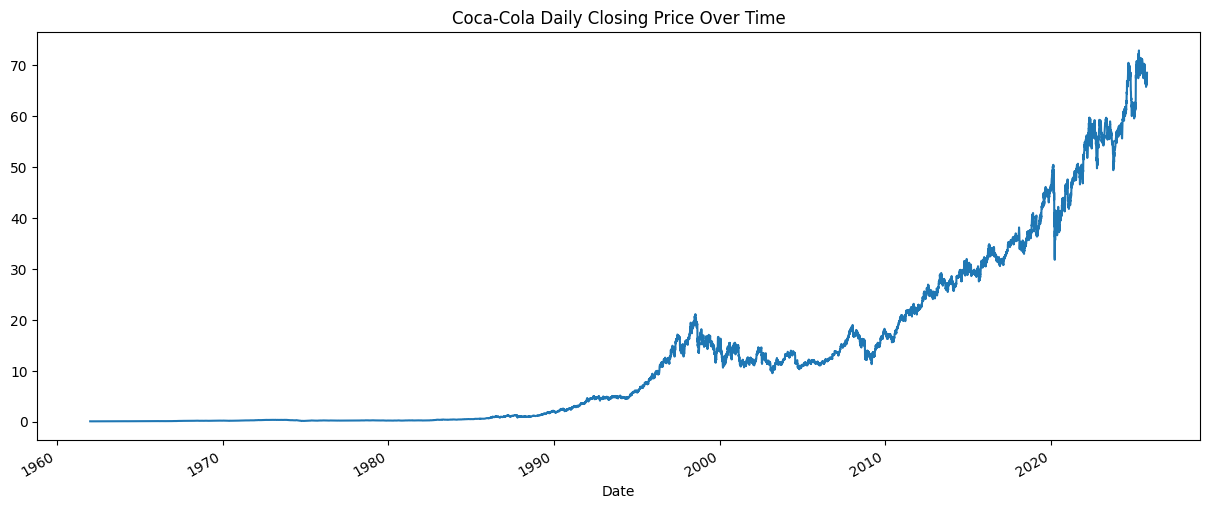

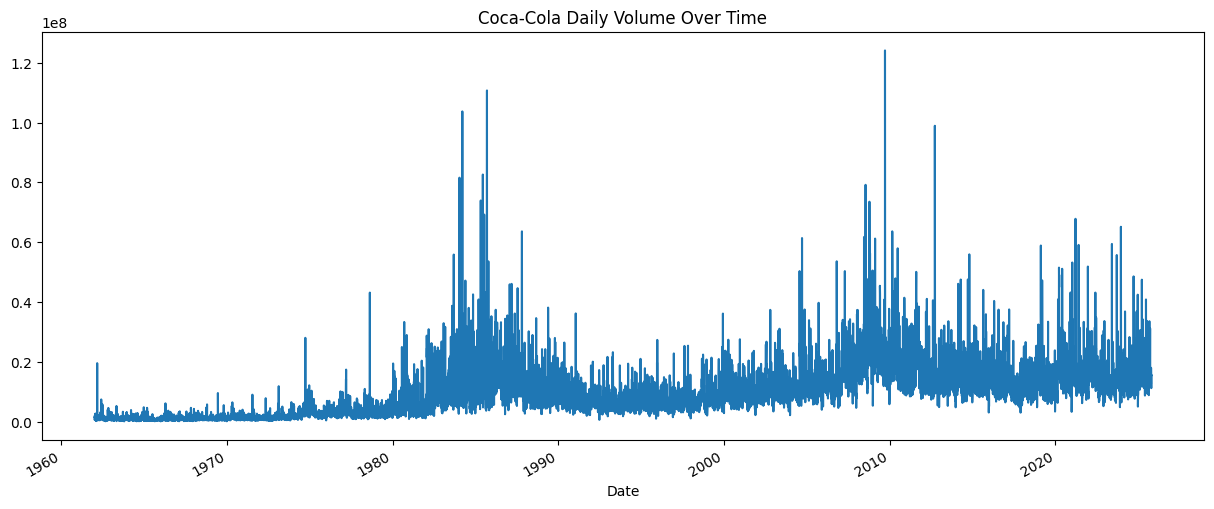

In [23]:
# Visualizing the time series is essential to identify points that deviate significantly from the surrounding trend.

plt.figure(figsize=(15, 6))
df['close'].plot(title='Coca-Cola Daily Closing Price Over Time')
plt.show()

plt.figure(figsize=(15, 6))
df['volume'].plot(title='Coca-Cola Daily Volume Over Time')
plt.show()


### Observations:
### 1. For the Daily closing price, the graph shows growth over time, with the price reaching a local peak in the late 1990s before falling briefly and experiencing a soaring but smooth growth, with one massive spike in 2020.
### 2. In the Daily Volume graph, there are occasional extreme spikes between 1980 and 1990 and around 2010, indicating significant news events (e.g., earnings, acquisitions, splits). Otherwise, there are moderate but noticeable spikes over time.

# Rolling Statistics (Mean and Standard Deviation)
## Calculating a rolling mean and standard deviation to see if any points fall many standard deviations away from their local neighborhood average.
# $$\text{Daily Return} = \frac{\text{Close}_t - \text{Close}_{t-1}}{\text{Close}_{t-1}} \times 100$$

In [24]:
df['daily_return'] = df['close'].pct_change() * 100

# Inspecting returns greater than a specific threshold (e.g., 5-10 standard deviations)
rolling_std = df['daily_return'].rolling(window=252).std() # 252 trading days/year
outliers_return_for_std_5 = df[abs(df['daily_return']) > rolling_std.mean() * 5] 
print(len(outliers_return_for_std_5))

outliers_return_for_std_5.describe().T

43


,count,mean,std,min,25%,50%,75%,max
open,43.0,9.673688e+00,1.281283e+01,3.730000e-02,2.306500e-01,4.005900e+00,1.335065e+01,5.891370e+01
high,43.0,9.926591e+00,1.294443e+01,3.730000e-02,2.403000e-01,4.260500e+00,1.395530e+01,5.900380e+01
low,43.0,9.183951e+00,1.206238e+01,3.460000e-02,2.242000e-01,4.005900e+00,1.266200e+01,5.489730e+01
close,43.0,9.468956e+00,1.219799e+01,3.460000e-02,2.338500e-01,4.246800e+00,1.355035e+01,5.511340e+01
volume,43.0,2.652946e+07,1.805101e+07,3.456000e+06,1.236080e+07,2.027040e+07,3.923980e+07,6.364000e+07
daily_return,43.0,-3.410788e-01,9.880051e+00,-2.468941e+01,-8.675392e+00,-6.835608e+00,7.843664e+00,1.967793e+01


In [25]:

outliers_return_for_std_10 = df[abs(df['daily_return']) > rolling_std.mean() * 10] 
print(len(outliers_return_for_std_10))

outliers_return_for_std_10.describe().T

3


,count,mean,std,min,25%,50%,75%,max
open,3.0,4.862467e+00,6.883169e+00,7.763000e-01,8.890000e-01,1.001700e+00,6.905550e+00,1.280940e+01
high,3.0,5.357400e+00,7.500948e+00,1.001700e+00,1.026750e+00,1.051800e+00,7.535250e+00,1.401870e+01
low,3.0,4.749033e+00,6.924409e+00,7.262000e-01,7.512500e-01,7.763000e-01,6.760450e+00,1.274460e+01
close,3.0,5.205667e+00,7.563748e+00,7.638000e-01,8.389500e-01,9.141000e-01,7.426600e+00,1.393910e+01
volume,3.0,5.260747e+07,1.013710e+07,4.370400e+07,4.709120e+07,5.047840e+07,5.705920e+07,6.364000e+07
daily_return,3.0,2.956064e+00,2.411657e+01,-2.468941e+01,-5.404868e+00,1.387968e+01,1.677880e+01,1.967793e+01


## Box Plot on Returns (Focused Outlier Detection)
## While less ideal for the absolute price, a Box Plot applied to the daily returns can clearly highlight days with exceptionally high volatility, as returns tend to be stationary.

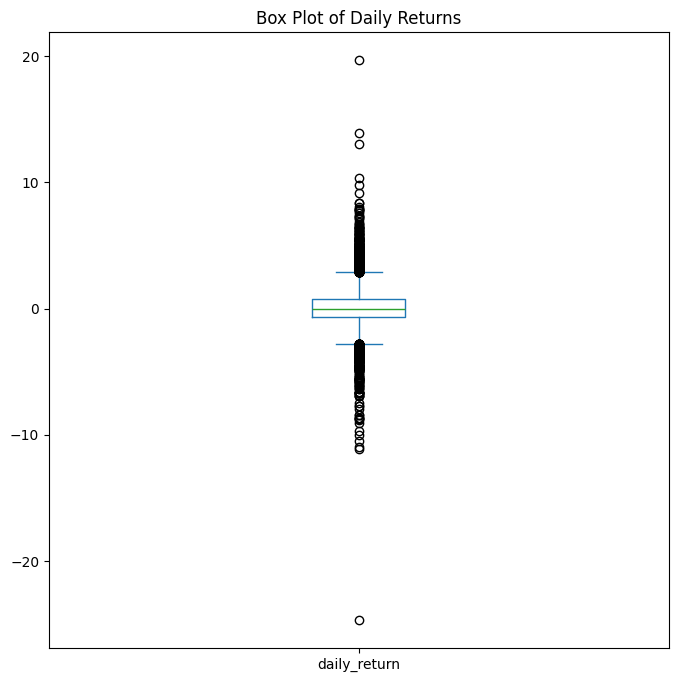

In [26]:
plt.figure(figsize=(8, 8))
df['daily_return'].plot(kind='box', title='Box Plot of Daily Returns')
plt.show()

### Observation: Most dots outside the whiskers are within a 10 range (positive and negative), with only a few outside its range. However, the two most notable outliers are located on +20 and beyond -20 in the plot.

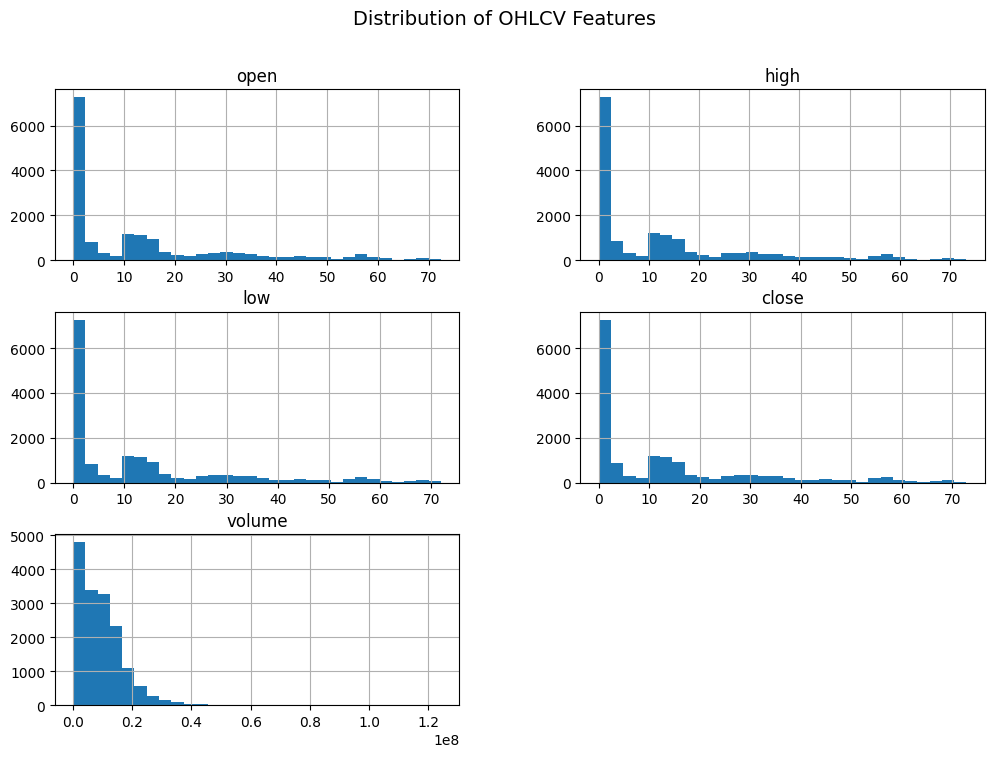

In [27]:
# Plotting Historams to outline the data distributions

df[['open', 'high', 'low', 'close', 'volume']].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribution of OHLCV Features", fontsize=14)
plt.show()


### Observations: The distributions of all the attributes are skewed to the left, especially near 0.

In [28]:
# Z-score, a statistical method to flag potential anomalies.
import numpy as np

# Example: Z-score for close price
z = (df['close'] - df['close'].mean()) / df['close'].std()
df_outliers = df[np.abs(z) > 3]
df_outliers.head()



,open,high,low,close,volume,ticker,name,daily_return
Date,,,,,,,,
2024-07-26 00:00:00-04:00,63.7041,64.7069,63.6463,64.6490,13530100,KO,The Coca-Cola Company (KO) Historical Data,1.483264
2024-07-30 00:00:00-04:00,64.0995,65.4011,63.9837,65.2565,13258000,KO,The Coca-Cola Company (KO) Historical Data,1.271942
2024-08-01 00:00:00-04:00,64.6008,65.6711,64.3116,65.5264,16495900,KO,The Coca-Cola Company (KO) Historical Data,1.827969
2024-08-02 00:00:00-04:00,66.0760,67.1752,65.2661,66.8474,22514800,KO,The Coca-Cola Company (KO) Historical Data,2.015981
2024-08-05 00:00:00-04:00,66.5196,67.0595,65.3047,65.6614,25484300,KO,The Coca-Cola Company (KO) Historical Data,-1.774190


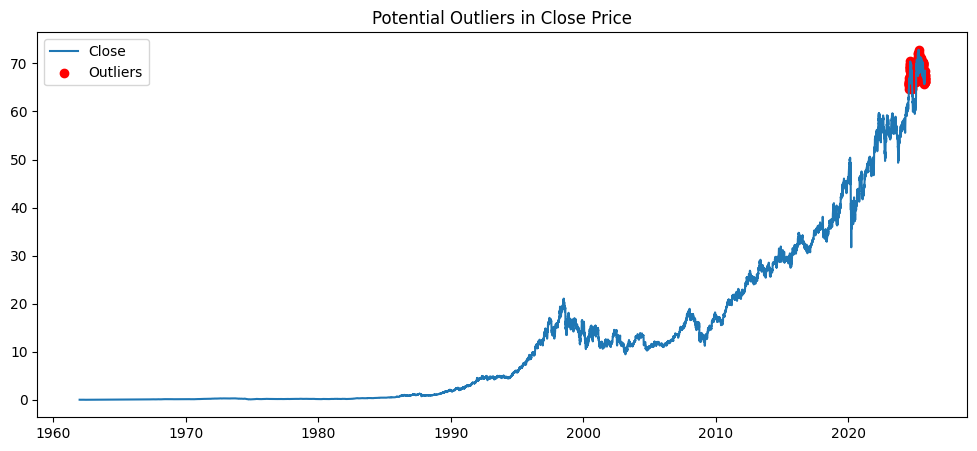

In [29]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['close'], label='Close')
plt.scatter(df_outliers.index, df_outliers['close'], color='red', label='Outliers')
plt.legend()
plt.title("Potential Outliers in Close Price")
plt.show()


### The marked Outlier highlights the most recent Close price spike, which supports the soaring growth over time pattern.

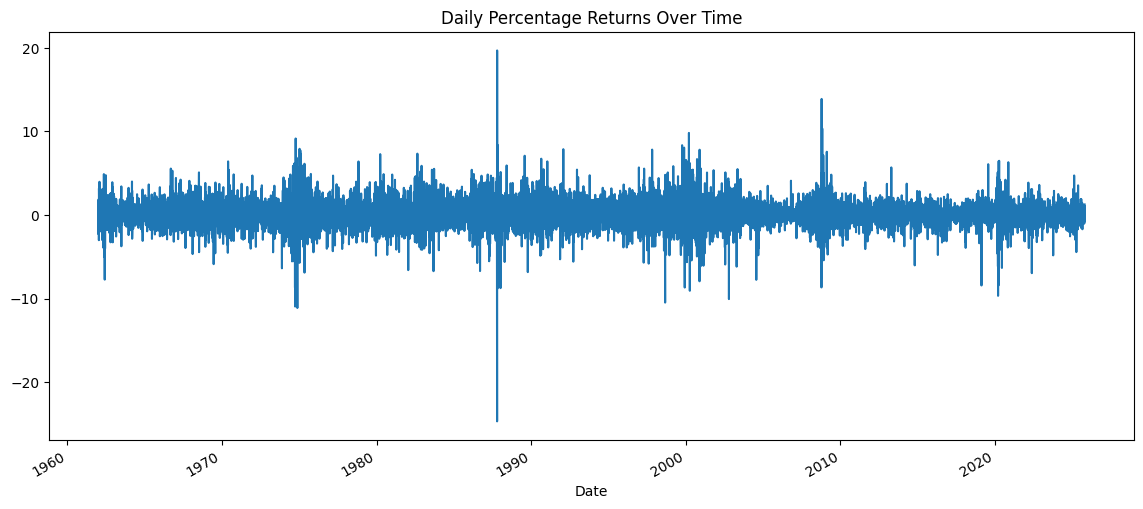

In [30]:
# Time Plot of Returns (shows volatility clusters)
plt.figure(figsize=(14, 6))
df['daily_return'].plot(title='Daily Percentage Returns Over Time')
plt.show()

### Observations: six notable groups of spikes can be discovered: a small spike in the early 1960s, moderate spikes in mid-1970s, the largest spikes in late-1980s, minor but prolonged spikes around the year 2000, second largest spikes just before 2010, and another mini spikes around the 2020s.

## Correlation & Relationships (optional but insightful)
### We can check how OHLC prices and volume relations:

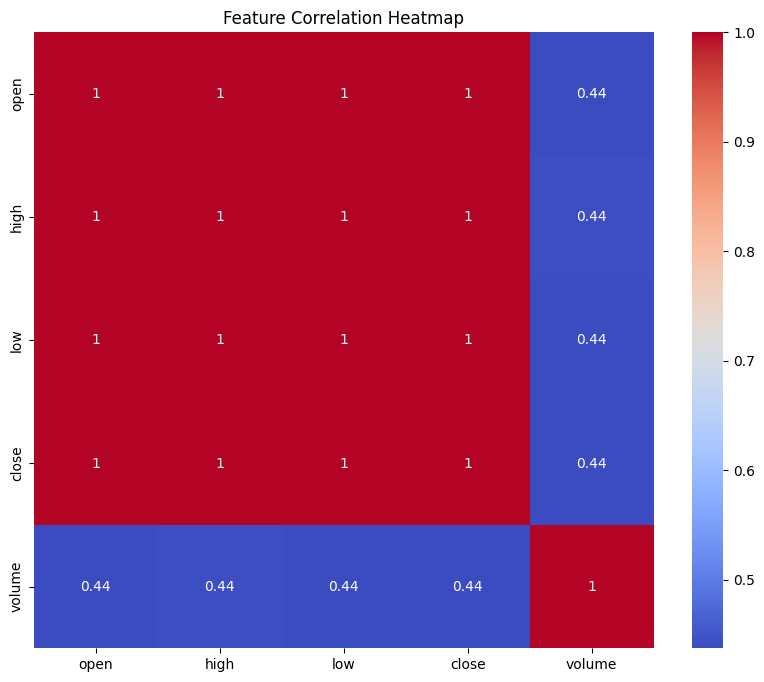

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['open','high','low','close','volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# This will help confirm expected relationships (e.g., open, high, low, close are usually highly correlated).

### Observation: The correlation among close, low, high, and open reveal 1, while the correlations of volume with other features show 0.44 for all cases.

# Stationarity Check (Critical Time-Series Step)
### A core assumption for many time-series models (like ARIMA) is that the data is stationary (meaning its statistical properties like mean and variance don't change over time). Price data is almost never stationary, but returns often are.

In [32]:
# Use the ADfuller test from statsmodels (requires import)
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['close'].dropna())
print(f'ADF Statistic: {adf_result[0]:.2f}')
print(f'p-value: {adf_result[1]:.5f}')
# Interpretation: A high p-value indicates non-stationarity.

ADF Statistic: 2.47
p-value: 0.99904


## Statistical: Run the Augmented Dickey-Fuller (ADF) Test. 
## If the p-value is high (e.g., $>0.05$), the series is non-stationary (usually the case for price).
## The adfuller function in Python, part of the statsmodels.tsa.stattools library, performs the Augmented Dickey-Fuller (ADF) test for unit roots in time series data. This test is used to determine if a time series is stationary.

### Function of the ADF statistic
### Null hypothesis: The ADF test's null hypothesis is that a time series has a unit root, meaning it is non-stationary
### Alternative hypothesis: The alternative is that the time series is stationary.
### Interpretation: A larger (less negative) ADF statistic provides less evidence against the null hypothesis, while a more negative ADF statistic provides stronger evidence to reject it.
### Decision rule: The decision to reject the null hypothesis is made by comparing the ADF statistic to the critical values at different significance levels (e.g., 1%, 5%, 10%). If the ADF statistic is less than the critical value, the null hypothesis is rejected, and the series is considered stationary. You compare this statistic to the critical values provided by the test; if it's lower, you reject the null hypothesis and conclude the series is stationary.

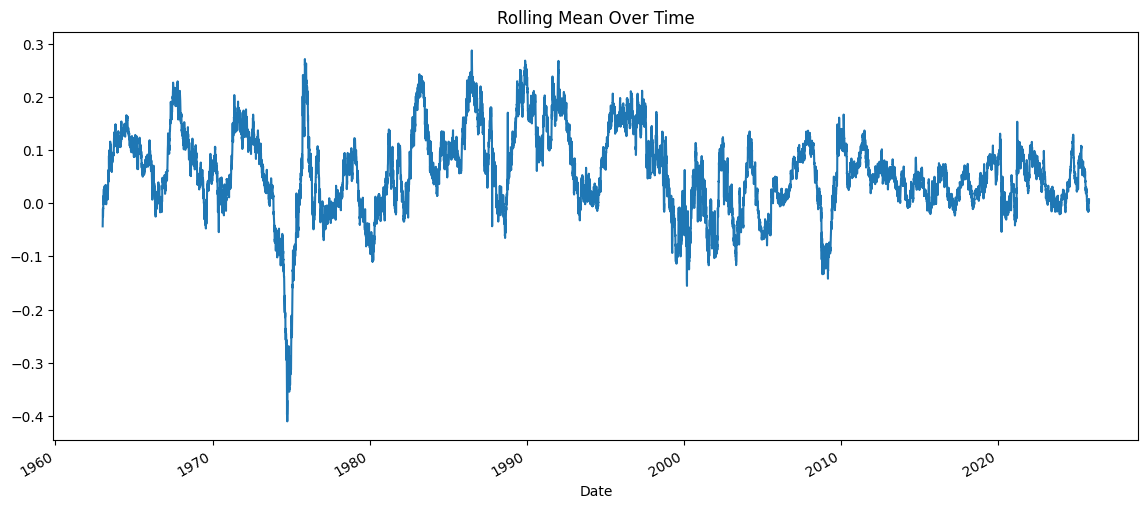

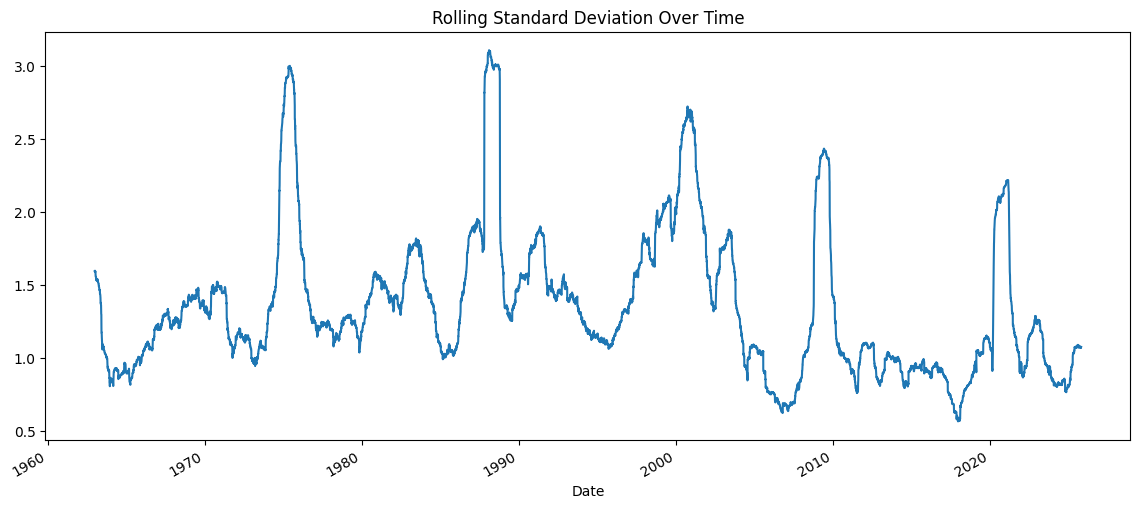

In [33]:
# Visual: Plot Rolling Mean and Rolling Standard Deviation. If they are trending, the data is non-stationary.

rolling_mean = df['daily_return'].rolling(window=252).mean()
plt.figure(figsize=(14, 6))
rolling_mean.plot(title='Rolling Mean Over Time')
plt.show()

plt.figure(figsize=(14, 6))
rolling_std.plot(title='Rolling Standard Deviation Over Time')
plt.show()

### Observations: Both graphs show a trending pattern with an upward or downward direction over time, which indicates that a trending pattern in the time-series graph is non-stationary.

In [36]:
# Save the cleaned dataframe (free of precision errors)

df.to_csv("../datasets/interim/coca_cola_ohlc_cleaned.csv")
print("Cleaned data saved to 'interim' directory.")

Cleaned data saved to 'interim' directory.
